In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("hotel_booking.csv")

In [34]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,phone-number,credit_card,month,total_guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,669-792-1661,************4322,7,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,858-637-6955,************9157,7,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,652-885-2745,************3734,7,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,364-656-8427,************5677,7,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,713-226-5883,************5498,7,2.0
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,190-271-6743,************9263,7,2.0
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,Transient,107.0,0,0,Check-Out,2015-07-03,420-332-5209,************6994,7,2.0
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,Transient,103.0,0,1,Check-Out,2015-07-03,286-669-4333,************8729,7,2.0
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,Transient,82.0,0,1,Canceled,2015-05-06,341-726-5787,************3639,5,2.0
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,Transient,105.5,0,0,Canceled,2015-04-22,316-648-6176,************9190,4,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [7]:
df.describe(include ='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [8]:
for col in df.describe(include ='object').columns:
    #print(col)
    print(df[col].unique())

['Resort Hotel' 'City Hotel']
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
['BB' 'FB' 'HB' 'SC' 'Undefined']
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN

In [9]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [10]:
#remove unnecessary columns
df.drop(['agent','company','name','email'],axis=1, inplace=True)

In [11]:
df.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [12]:
#remove null values
df.dropna(inplace=True)

<AxesSubplot:>

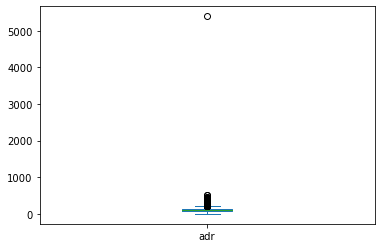

In [13]:
df['adr'].plot(kind='box')

In [14]:
#there is outlier so, we have to remove it
df= df[df['adr']<5000]

# Data Analysis and Visualization

In [15]:
#percentage of cancelled and not cancelled values
cancelled_perc = df['is_canceled'].value_counts(normalize =True)
cancelled_perc

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

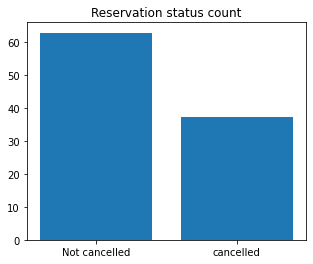

In [16]:
plt.figure(figsize=(5,4))
plt.title("Reservation status count")
plt.bar(["Not cancelled","cancelled"],df['is_canceled'].value_counts(normalize =True).mul(100))
plt.show()

**insights:**
the accompanying bar graph shows the percentage of reservations that are cancelled and those that are not. it is obvious that there are still significant number of reservations that have not been cancelled. there are still 37% of clients who cancelled their reservations, which has significant impact on the hotels earnings.

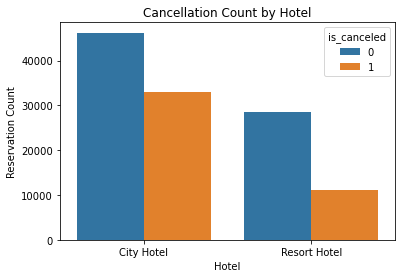

In [17]:
# Calculate the cancellation count for each hotel
cancellation_count = df.groupby('hotel')['is_canceled'].value_counts().reset_index(name='cancellation_count')

# Bar plot of cancellation count by hotel
sns.barplot(data=cancellation_count, x='hotel', y='cancellation_count', hue='is_canceled')
plt.title('Cancellation Count by Hotel')
plt.xlabel('Hotel')
plt.ylabel('Reservation Count')
plt.show()

In [18]:
resort_hotel = df[df['hotel']=="Resort Hotel"]
resort_hotel['is_canceled'].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [19]:
city_hotel = df[df['hotel']=="City Hotel"]
city_hotel['is_canceled'].value_counts(normalize=True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

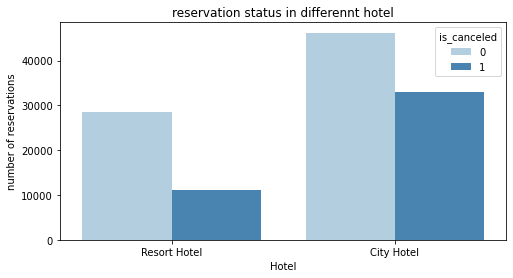

In [20]:
# reservation status in differennt hotel
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='hotel', hue='is_canceled', palette='Blues')
plt.title('reservation status in differennt hotel')
plt.xlabel('Hotel')
plt.ylabel('number of reservations')
plt.show()

**insights:**
In comparison to resort hotels, city hotels have more bookings. it's possible that resort hotels are more expensive then those in cities.

In [21]:
resort_hotel =resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel =city_hotel.groupby('reservation_status_date')[['adr']].mean()

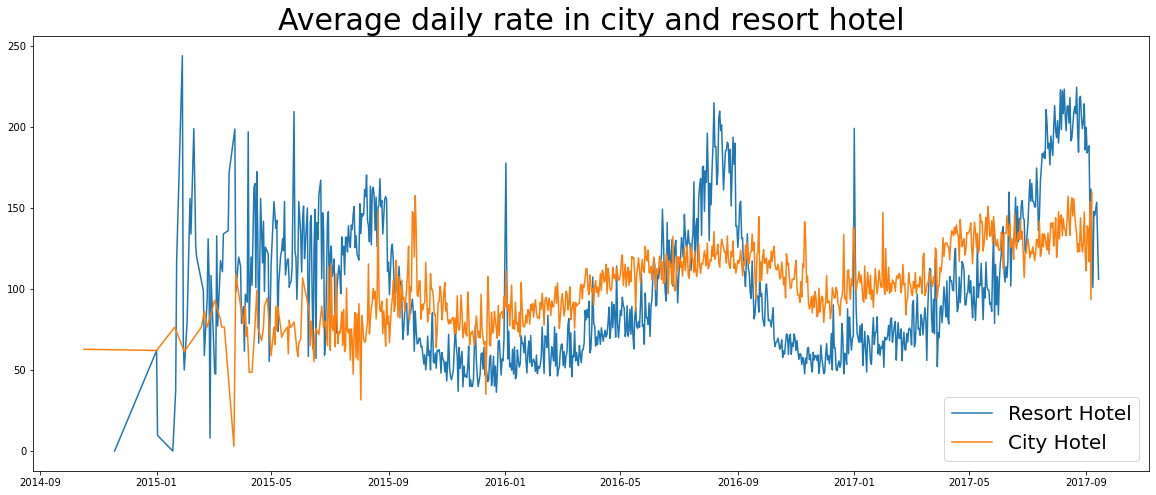

In [22]:
plt.figure(figsize=(20,8))
plt.title("Average daily rate in city and resort hotel", fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'], label='Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'], label='City Hotel')
plt.legend(fontsize=20)
plt.show()

**insights:**
the line graph above shows that on certain days, the average daily rate for city hotel is less then that of a resort hotel, and on other days, it is even less. it goes without saying that weekends and holidays may see a rise in resort hotel rates.

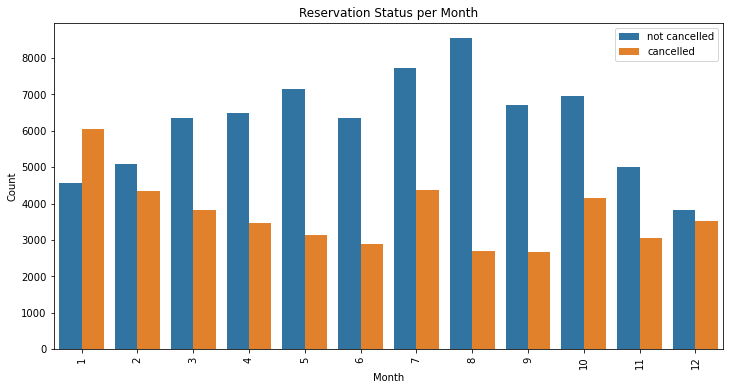

In [23]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='month', hue='is_canceled')
plt.title('Reservation Status per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(['not cancelled','cancelled'])
plt.xticks(rotation=90)
plt.show()

**insights:**
we have create the grouped bar graph to analyze the months with the highest and lowest reservation levels according to reservation status. as can be seen, both the number of confirmed reservations and the number of cancelled reservations are largest in the month of August whereas January is the month with the most cancelled reservations.

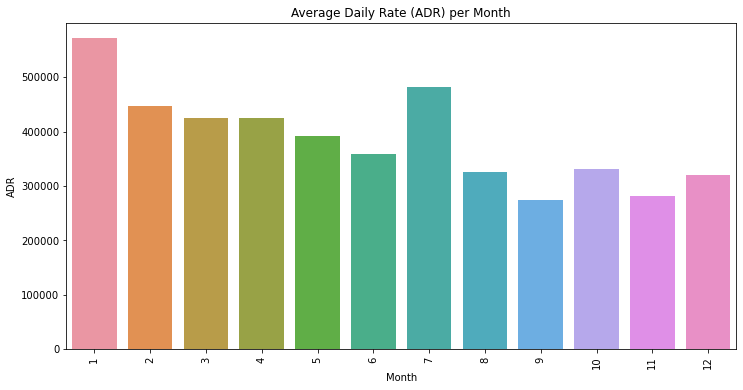

In [24]:
# Calculate average daily rate (ADR) per month
adr_per_month = df[df['is_canceled']==1].groupby('month')['adr'].sum().reset_index()

# Create a bar plot of ADR per month
plt.figure(figsize=(12, 6))
sns.barplot(data=adr_per_month, x='month', y='adr')
plt.title('Average Daily Rate (ADR) per Month')
plt.xlabel('Month')
plt.ylabel('ADR')
plt.xticks(rotation=90)
plt.show()

**insights:**
This bar graph demonstrates that cancellations are most common when prices are greatest and are least common when they are lowest. Therefore, the cost of the accommodation is solely responsible for the cancellation.


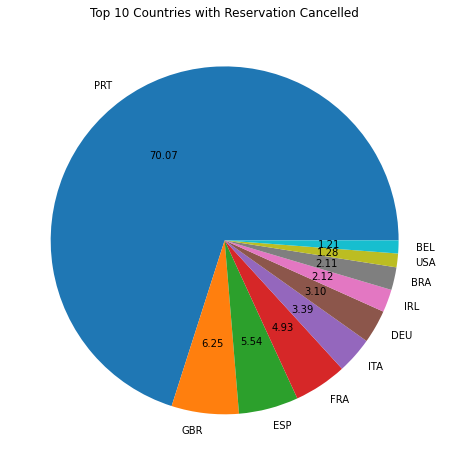

In [25]:
cancaled_data =df[df['is_canceled']==1]
top_10_countries=cancaled_data['country'].value_counts()[:10]
plt.figure(figsize=(8, 8))
plt.title('Top 10 Countries with Reservation Cancelled')
plt.pie(top_10_countries, autopct='%.2f',labels=top_10_countries.index)
plt.show()

**insights:**
Now, let's see which country has the highest reservation canceled. The top country is Portugal with the highest number of cancellations.

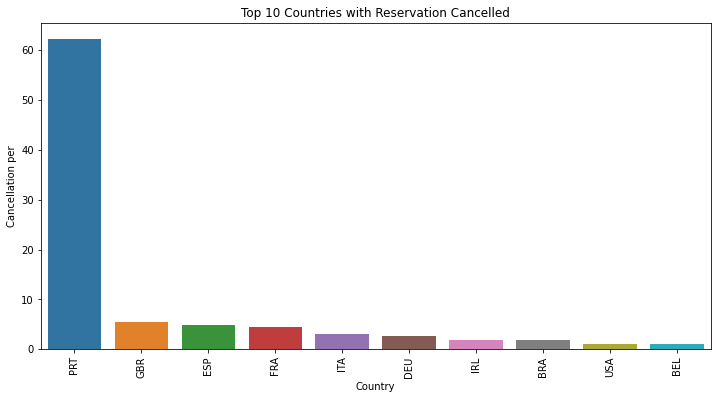

In [26]:
cancaled_data =df[df['is_canceled']==1]
top_10_countries=cancaled_data['country'].value_counts(normalize=True).mul(100)[:10]
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values)
plt.title('Top 10 Countries with Reservation Cancelled')
plt.xlabel('Country')
plt.ylabel('Cancellation per')
plt.xticks(rotation=90)
plt.show()

In [27]:
df['market_segment'].value_counts(normalize=True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [28]:
cancaled_data['market_segment'].value_counts(normalize=True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

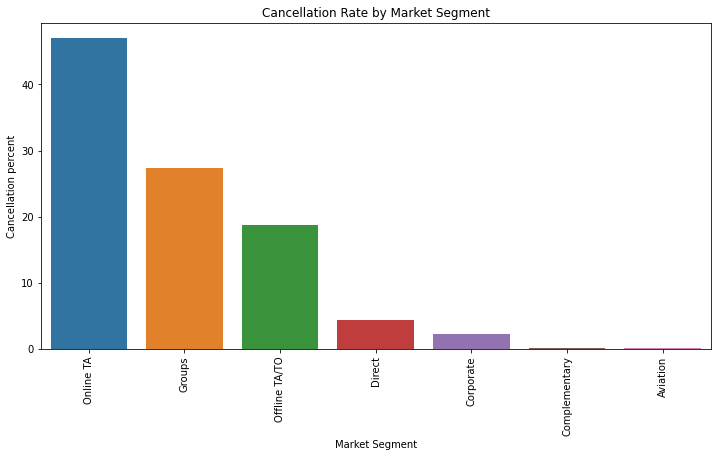

In [29]:
# Analyze cancellation rate by market segment
df_market_segment = cancaled_data['market_segment'].value_counts(normalize=True).mul(100)
plt.figure(figsize=(12, 6))
sns.barplot(x=df_market_segment.index,  y=df_market_segment.values)
plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation percent')
plt.xticks(rotation=90)
plt.show()

**insights:**
Most cancellation are coming from Online Travel Agencies 46% and then followed by Groups which is 18%.

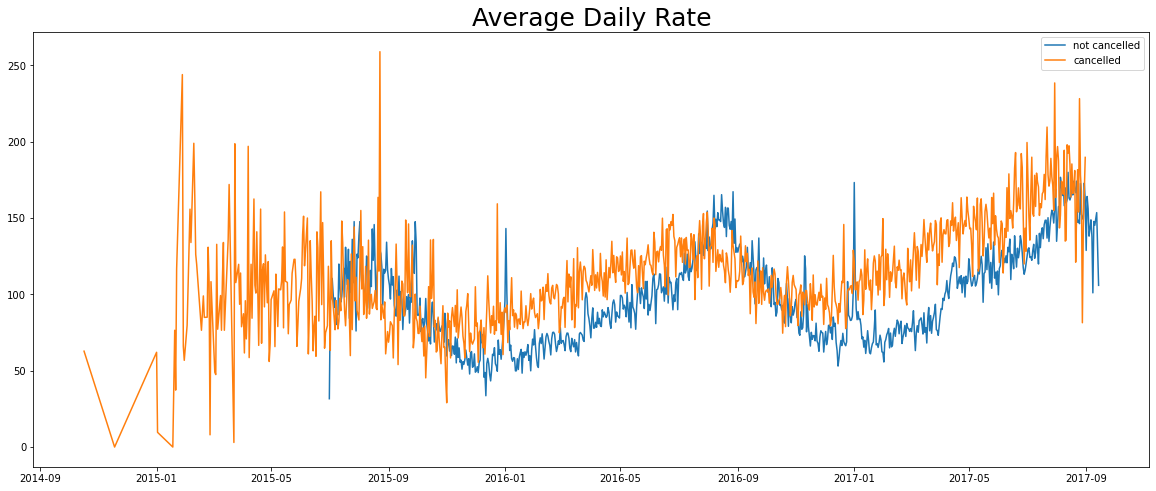

In [30]:
cancaled_df_adr = cancaled_data.groupby('reservation_status_date')[['adr']].mean()
cancaled_df_adr.reset_index(inplace=True)
cancaled_df_adr.sort_values('reservation_status_date', inplace=True)

not_cancaled_data =df[df['is_canceled'] ==0]
not_cancaled_df_adr = not_cancaled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancaled_df_adr.reset_index(inplace=True)
not_cancaled_df_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize=(20,8))
plt.title('Average Daily Rate', fontsize=25)
plt.plot(not_cancaled_df_adr['reservation_status_date'], not_cancaled_df_adr['adr'], label='not cancelled')
plt.plot(cancaled_df_adr['reservation_status_date'], cancaled_df_adr['adr'], label='cancelled')
plt.legend()



In [31]:
cancaled_df_adr = cancaled_df_adr[(cancaled_df_adr['reservation_status_date']>'2016') & (cancaled_df_adr['reservation_status_date']<'2017-09')]
not_cancaled_df_adr = not_cancaled_df_adr[(not_cancaled_df_adr['reservation_status_date']>'2016') & (not_cancaled_df_adr['reservation_status_date']<'2017-09')]

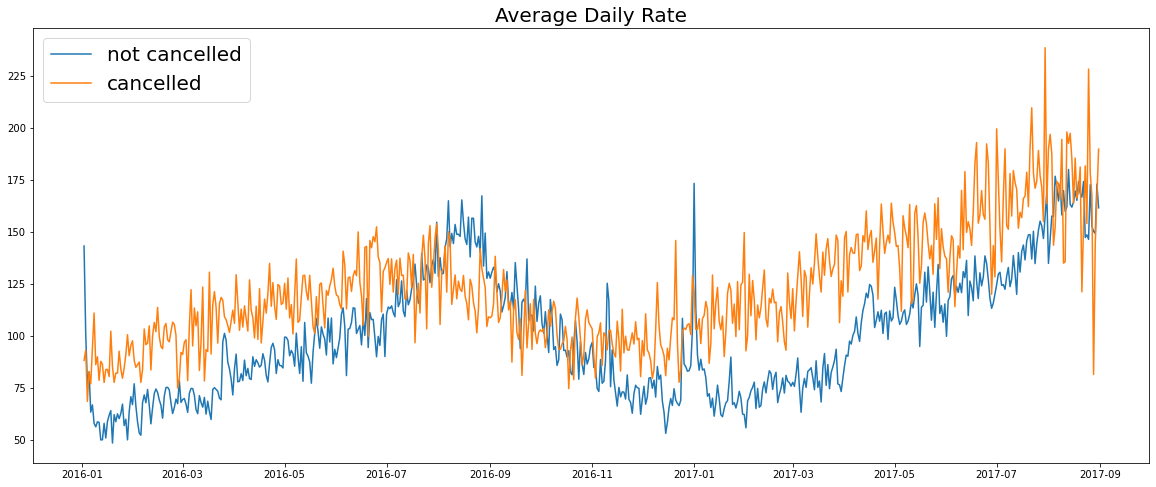

In [32]:

plt.figure(figsize=(20,8))
plt.title('Average Daily Rate', fontsize=20)
plt.plot(not_cancaled_df_adr['reservation_status_date'], not_cancaled_df_adr['adr'], label='not cancelled')
plt.plot(cancaled_df_adr['reservation_status_date'], cancaled_df_adr['adr'], label='cancelled')
plt.legend(fontsize=20)


**insights:**
As seen in the graph, reservations are canceled when the average daily rate is higher than when it is not canceled. It clearly proves all the above analysis, that the higher price leads to higher cancellation.

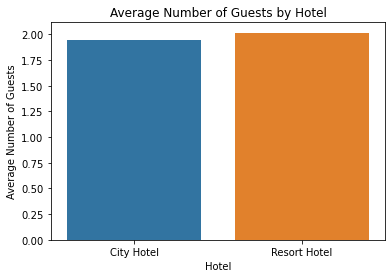

In [33]:
# Calculate average number of guests (adults, children, babies) per booking
df['total_guests'] = df['adults'] + df['children'] + df['babies']
average_guests = df.groupby('hotel')['total_guests'].mean().reset_index()
average_guests.columns = ['hotel', 'average_guests']

# Bar plot of average number of guests by hotel
sns.barplot(data=average_guests, x='hotel', y='average_guests')
plt.title('Average Number of Guests by Hotel')
plt.xlabel('Hotel')
plt.ylabel('Average Number of Guests')
plt.show()